In [2]:
from transformers import pipeline
from PIL import Image
import requests
import os

In [72]:
demo_img_folder = "/home/yuanzf/uvi-time-machine/demo_img"
demo_img_export = "/home/yuanzf/uvi-time-machine/demo_img/seg"
os.makedirs(demo_img_export, exist_ok=True)
files = os.listdir(demo_img_folder)

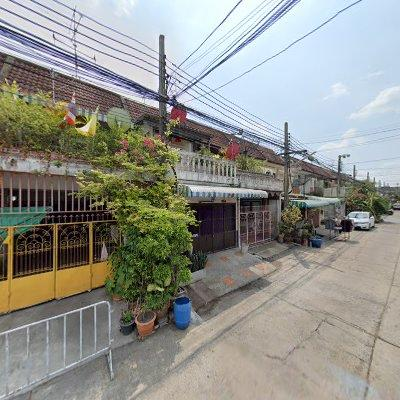

In [15]:
img = Image.open(os.path.join(demo_img_folder, files[1]))
img

In [ ]:
semantic_segmentation = pipeline(
    "image-segmentation", "nvidia/segformer-b1-finetuned-cityscapes-1024-1024"
)
# results = semantic_segmentation(img)
# results

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


[{'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=400x400>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=400x400>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=400x400>},
 {'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=400x400>},
 {'score': None,
  'label': 'fence',
  'mask': <PIL.Image.Image image mode=L size=400x400>},
 {'score': None,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=400x400>},
 {'score': None,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=400x400>},
 {'score': None,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=400x400>},
 {'score': None,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=400x400>},
 {'score': None,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=400x400>},
 {'score': None,
  'label': 'bus',
  'mask': <PIL.Image.Image ima

In [32]:
import pandas as pd
viscolor = pd.read_csv("/home/yuanzf/uvi-time-machine/_script/object150.csv")

In [ ]:
import json
viscolor['name_short'] = viscolor['name'].apply(lambda x: x.split(',')[0])
viscolor["name_short"].unique()
viscolor['color'] = viscolor['color'].apply(lambda x: json.loads(x))
colordict = viscolor.set_index("name_short")["color"].to_dict()
colordict["vegetation"] = [4, 200, 3]
colordict["train"] = [0, 102, 204]

In [ ]:
# viscolor = viscolor.set_index("name")

In [74]:
import numpy as np
from tqdm import tqdm
for f in files:
    img = Image.open(os.path.join(demo_img_folder, f))
    results = semantic_segmentation(img)
    h,w = img.size
    color_segs = np.zeros((h, w, 3), dtype=np.uint8)
    for i in range(len(results)):
        try:
            color_segs[np.array(results[i]["mask"]) == 255, :] = colordict[results[i]["label"]]
        except:
            print(f"label {results[i]['label']} not in colordict")
            # get a random color
            color_segs[np.array(results[i]["mask"]) == 255, :] = np.random.randint(0, 255, size=(3,))
    color_segs = color_segs[..., ::-1]
    seg_img = Image.fromarray(color_segs)
    seg_img.save(os.path.join(demo_img_export, f))


label terrain not in colordict
label rider not in colordict
label terrain not in colordict
label terrain not in colordict
label terrain not in colordict
label terrain not in colordict


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


label traffic sign not in colordict
label terrain not in colordict
label rider not in colordict
label traffic sign not in colordict
label terrain not in colordict
label traffic sign not in colordict
label terrain not in colordict
label traffic sign not in colordict
label terrain not in colordict
label rider not in colordict
label terrain not in colordict
label traffic sign not in colordict
label terrain not in colordict
label terrain not in colordict
label traffic sign not in colordict
label terrain not in colordict
label terrain not in colordict
label rider not in colordict
label motorcycle not in colordict
label terrain not in colordict
label traffic sign not in colordict
label terrain not in colordict
label traffic sign not in colordict
label terrain not in colordict
label traffic sign not in colordict
label terrain not in colordict
label traffic sign not in colordict
label terrain not in colordict
label rider not in colordict
label terrain not in colordict
label traffic sign not in

IsADirectoryError: [Errno 21] Is a directory: '/home/yuanzf/uvi-time-machine/demo_img/seg'

In [76]:
files

['-ORne_ZFjMgpePx9bRFfhw_180.jpg',
 '_FSxZDnG1jkFOovqfiyhVA_270.jpg',
 '1rVWDnV420ep491-5SOPgg_0.jpg',
 '2K0ASZSUeG3zBRbH792zvQ_270.jpg',
 '2QmnRFCSAzoWQobe2aMl3Q_270.jpg',
 '4Mbqc5zlk5VpsLfhYzRHdg_180.jpg',
 '4zWrzfexvI-zAFtZVe8OhQ_180.jpg',
 '5cYvSB48V3U8O9dGfjFatw_90.jpg',
 '5E_O77TtjdH13wI0k-c5Hw_90.jpg',
 '6jnNSFjdYyCvGOrYsjIgrA_90.jpg',
 '5H5wS10LYSl1Tkv6g_kg7Q_180.jpg',
 '6zMgAbY0FmSiBqfAAYjspw_90.jpg',
 '6QtqbZZW2OIHHA1cVN6cPw_270.jpg',
 '7OWQe9I_-aDB9zRPHK_3jQ_270.jpg',
 '7p9o4oCY9bdme4XareG-Kw_180.jpg',
 '8gDV7Sq8MB5pWUCuAW29yw_180.jpg',
 '8kePW9PA-MIDS9XHRPu2CA_180.jpg',
 '9MXFrGugvJovpyk8W4R_BA_0.jpg',
 '9NGJdL83cx6nARLv9RtFMA_180.jpg',
 'B-JzEVnntbUhpYLbLIyjjw_90.jpg',
 'c3TykKGtryWGZLc1a0zfoQ_0.jpg',
 'eaXvKUWrmldIv0F5q99pAw_180.jpg',
 'DlNZluXcBUuub9vNOPomWg_270.jpg',
 'J8EemQZ12BHbQh0m6AW2Eg_270.jpg',
 'mKWliOXTJFxnIyJXtGZwdw_180.jpg',
 'MxgYrndWb8XJBHIOMpAJtw_270.jpg',
 'N85V6sA4TylNrWXr-tPpRQ_0.jpg',
 'Nhaf3ZQKJ6BSYOV_vxSo_A_0.jpg',
 'O1Z5WSfoZNtEeP5ExeffSQ_90.jpg',
 

In [75]:
f

'seg'

In [ ]:
import numpy as np
# loop through the results and create a mask for each class, color it with the corresponding color, generate a new image
def create_mask(results, viscolor):
    masks = []
    for i in range(len(results)):
        mask = np.zeros((results[i]['height'], results[i]['width']), dtype=np.uint8)
        mask[results[i]['mask'] == 1] = viscolor.iloc[results[i]['label']]['color']
        masks.append(mask)
    return masks

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)